# PfDA PROJECT 1: *BREAST CANCER DIAGNOSTIC DATASET*

TABLE OF CONTENTS

1. Background information. 
2. Breast cancer diagnostic: Real-world dataset.
3. Model and synthesize the dataset.
4. Discussion.
5. References. 

## 1. BACKGROUND INFORMATION

## 2. BREAST CANCER DIAGNOSTIC: REAL-WORLD DATASET  

In [3]:
import pandas as pd

realdata = pd.read_csv("data.csv")

realdata

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [17]:
df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean
0,M,17.99,10.38,122.80,1001.0
1,M,20.57,17.77,132.90,1326.0
2,M,19.69,21.25,130.00,1203.0
3,M,11.42,20.38,77.58,386.1
4,M,20.29,14.34,135.10,1297.0
...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0
565,M,20.13,28.25,131.20,1261.0
566,M,16.60,28.08,108.30,858.1
567,M,20.60,29.33,140.10,1265.0


In [18]:
pd.DataFrame.describe(df)

,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104
std,3.524049,4.301036,24.298981,351.914129
min,6.981000,9.710000,43.790000,143.500000
25%,11.700000,16.170000,75.170000,420.300000
50%,13.370000,18.840000,86.240000,551.100000
75%,15.780000,21.800000,104.100000,782.700000
max,28.110000,39.280000,188.500000,2501.000000


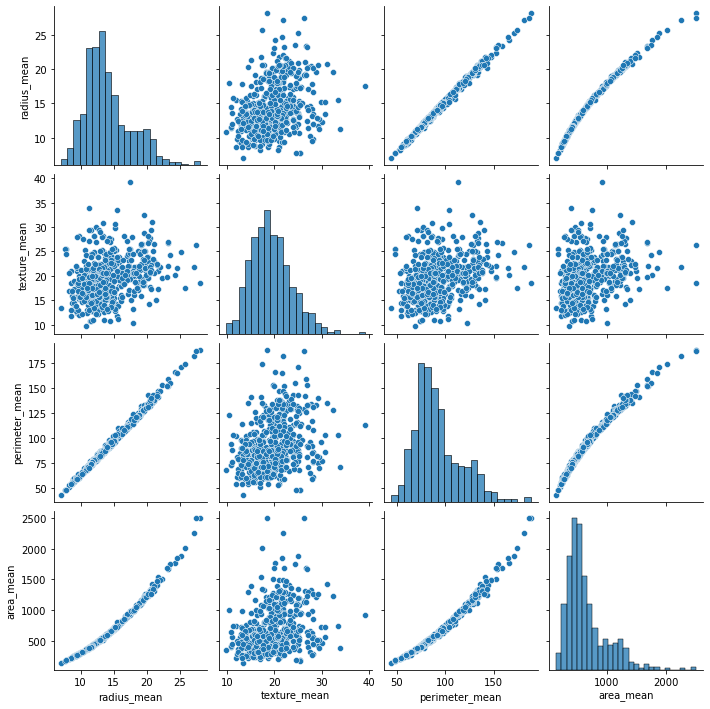

In [19]:
import seaborn as sns

sns.pairplot(df)


## 3. MODEL AND SYNTHESIZE THE DATASET 

In [59]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

realdata = pd.read_csv("data.csv")

df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]

diagnosis_mean= np.random.binomial(1,0.37,569)

diagnosis_list=[]
for i in diagnosis_mean:
    if i ==1:
        diagnosis_list.append("M")
    else:
        diagnosis_list.append("B")

radius_mean = np.clip(np.random.normal(np.mean(df["radius_mean"]),np.std(df["radius_mean"]),569),df["radius_mean"].min(),df["radius_mean"].max())
radius_mean.sort()

texture_mean = np.clip(np.random.normal(np.mean(df["texture_mean"]),np.std(df["texture_mean"]),569),df["texture_mean"].min(),df["texture_mean"].max())

perimeter_mean = np.clip(np.random.normal(np.mean(df["perimeter_mean"]),np.std(df["perimeter_mean"]),569),df["perimeter_mean"].min(),df["perimeter_mean"].max())
perimeter_mean.sort()

area_mean = np.clip(np.random.normal(np.mean(df["area_mean"]),np.std(df["area_mean"]),569),df["area_mean"].min(),df["area_mean"].max())
area_mean.sort()

ds =pd.DataFrame({"diagnosis": diagnosis_list,"radius_mean":radius_mean,"texture_mean":texture_mean,"perimeter_mean":perimeter_mean,"area_mean":area_mean})

pd.DataFrame.describe(ds)
#sns.pairplot(ds)



,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.445772,19.291004,91.116935,665.451678
std,3.416774,4.351679,23.708311,322.703347
min,6.981000,9.710000,43.790000,143.500000
25%,11.919627,16.085141,75.965994,426.210484
50%,14.509295,19.479238,91.154415,664.508666
75%,16.498875,22.407511,107.066208,885.409972
max,24.293738,31.926376,173.220298,1891.283286


In [ ]:
b

In [60]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

realdata = pd.read_csv("data.csv")

df = realdata[["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean"]]

diagnosis_mean= np.random.binomial(1,0.37,569)

diagnosis_list=[]
for i in diagnosis_mean:
    if i ==1:
        diagnosis_list.append("M")
    else:
        diagnosis_list.append("B")

radius_mean = np.clip(np.random.poisson(np.mean(df["radius_mean"]),569),df["radius_mean"].min(),df["radius_mean"].max())
radius_mean.sort()

texture_mean = np.clip(np.random.normal(np.mean(df["texture_mean"]),np.std(df["texture_mean"]),569),df["texture_mean"].min(),df["texture_mean"].max())

perimeter_mean = np.clip(np.random.poisson(np.mean(df["perimeter_mean"]),569),df["perimeter_mean"].min(),df["perimeter_mean"].max())
perimeter_mean.sort()

area_mean = np.clip(np.random.poisson(np.mean(df["area_mean"]),569),df["area_mean"].min(),df["area_mean"].max())
area_mean.sort()

ds =pd.DataFrame({"diagnosis": diagnosis_list,"radius_mean":radius_mean,"texture_mean":texture_mean,"perimeter_mean":perimeter_mean,"area_mean":area_mean})

pd.DataFrame.describe(ds)
#sns.pairplot(ds)


,radius_mean,texture_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000,569.000000
mean,14.191397,19.163825,91.938489,653.476274
std,3.787834,4.312710,9.689624,25.283113
min,6.981000,9.710000,64.000000,585.000000
25%,11.000000,16.277273,85.000000,635.000000
50%,14.000000,18.860461,92.000000,654.000000
75%,17.000000,22.084553,98.000000,670.000000
max,26.000000,32.041298,122.000000,728.000000


In [ ]:
import sklearn.neighbors as nei

inputs = ds[["radius_mean","texture_mean","perimeter_mean","area_mean"]]
outputs = df["diagnosis"]

knn = nei.KNeighborsClassifier(n_neighbors=5)

knn.fit(inputs,outputs)

#knn.predict([[18,20,90,500],[60,20,90,500],[18,30,90,500],[18,40,90,500],[18,38,90,500]])

(knn.predict(inputs)==outputs).sum()

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

knn = nei.KNeighborsClassifier(n_neighbors=5)

knn.fit(inputs_train,outputs_train)

(knn.predict(inputs_train)==outputs_train).sum()

knn.predict([[20.57,17.77,132.90,1326.0]])

## 4. DISCUSSION 

## 5. REFERENCES

(1) Katsura C, Ogunmwonyi I, Kankam HK, Saha S. Breast cancer: presentation, investigation and management. Br J Hosp Med (Lond). 2022 Feb 2;83(2):1-7. doi: 10.12968/hmed.2021.0459. Epub 2022 Feb 7. PMID: 35243878.

(dataset) https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download